# Exploration 3 - The Aggressor

In [87]:
from brian2 import *
import matplotlib.pyplot as plt
import random
from colour import Color
map_size = 100
global foodx, foody, food_count, bug_plot, food_plot, agg_sr_plot, agg_sl_plot,outbugx,outbugy,outbugang
global outfoodx,outfoody,outaggsrx,outaggsry,outaggslx,outaggsly#,outcowsrx,outcowsry,outcowslx,outcowsly
global food_colors, name_tags, count , colors, bug_colors, agg_list, cow_list, X, W, X_prime
start_scope()
count = 0
food_count = 0
foodx=50
foody=50
duration=2000
outbugx=np.zeros(int(duration/2))
outbugy=np.zeros(int(duration/2))
outbugang=np.zeros(int(duration/2))
outfoodx=np.zeros(int(duration/2))
outfoody=np.zeros(int(duration/2))
#outcowsrx=np.zeros(int(duration/2))
#outcowsry=np.zeros(int(duration/2))
#outcowslx=np.zeros(int(duration/2))
#outcowsly=np.zeros(int(duration/2))
outaggsrx=np.zeros(int(duration/2))
outaggsry=np.zeros(int(duration/2))
outaggslx=np.zeros(int(duration/2))
outaggsly=np.zeros(int(duration/2))
food_colors = []
bug_colors = []
name_tags = []
red = Color("red")
colors = list(red.range_to(Color("green"),32))

In [88]:
def generate_food(X, i,n=16):
    foods = np.zeros((4,16))
    #foods[0] = [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
    #foods[1] = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
    #foods[2] = [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
    #foods[3] = [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]
    
    # good good bad bad
    if i > 3:
        print("Making random food")
    elif i < 2:
        print("Making good food")
    elif (i > 1) and (i < 4):
        print("Making bad food")
    foods = [[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1],[1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1],[-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1],[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]]
    global colors
    #Generate food with random attributes of size n
    match0 = 0
    match1 = 0
    match2 = 0
    match3 = 0
    
    if i > 3:
        food_array = []
        for i in range(n):
            if random.random() < 0.5:
                food_array.append(1)
            else:
                food_array.append(-1)
    else:
        food_array = foods[i % 4]
        
    for j in range(n):
        if X[0][j] == food_array[j]: 
            match0 += 1
        if X[1][j] == food_array[j]: 
            match1 += 1
        if X[2][j] == food_array[j]: 
            match2 += 1
        if X[3][j] == food_array[j]: 
            match3 += 1
    
    best = np.max([match0, match1, match2, match3])
    if np.abs(best) > 9:
        print('best = ' + str(best) + ' agg1 = ' + str(match0) + ' agg2 = ' + str(match1) + ' cow1 = ' + str(match2) + ' cow2 = ' + str(match3))
        #if best == match2 or match3:
        #    val = 16 - best
        #elif best == match0 or match1: # agg list -> green
        #    print('15 + ' + str(match0) + ' = ' + str(15+match0) + ' and 15 + ' + str(match1) + ' = ' + str(15+match1))
        #    val = 15 + best
        if best == match0:
            print('agg')
        if best == match1:
            print('agg')
        if best == match2:
            print('cow')
            best = -best
        if best == match3:
            print('cow')
            best = -best
        val = 15 + best
        if (match0 == match2):
            #print('best = ' + str(best) + 'match0, match 2' + str (match0) + str(match2))
            if np.abs(best) == match0:
                print('matching02')
                val = 15 + (match0 + match1 - match2 - match3)
        elif (match0 == match3):
            #print('best = ' + str(best) + 'match0, match 3' + str (match0) + str(match3))
            if np.abs(best) == match0:
                print('matching03')
                val = 15 + (match0 + match1 - match2 - match3)
        elif (match1 == match2):
            #print('best = ' + str(best) + 'match1, match 2' + str (match1) + str(match2))
            if np.abs(best) == match1:
                print('matching12')
                val = 15 + (match0 + match1 - match2 - match3)
        elif (match1 == match3):
            #print('best = ' + str(best) + 'match1, match 3' + str (match1) + str(match3))
            if np.abs(best) == match1:
                print('matching13')
                val = 15 + (match0 + match1 - match2 - match3)
        
    else:
        val = 15 + (match0 + match1 - match2 - match3)
    food_color = colors[val].hex
    print('agg1 = ' + str(match0) + ' agg2 = ' + str(match1) + ' cow1 = ' + str(match2) + ' cow2 = ' + str( match3) + ' val = ' + str(val))
    print('food: ' + str(food_array))
    return food_array, food_color

In [89]:
def create_Babybehavior(food_array):
    #food_array = [1, 1, 1, 1]
    if food_array.count(1) > food_array.count(-1): 
        be = 'agg'
    elif food_array.count(-1) > food_array.count(1): 
        be = 'cow'
    else: 
        be = 'poo'
        print('oops no behavior detected, bug will be sleepy')

    return be

In [90]:
def create_behavior(food_array, agg_list, cow_list): 
    x_test = food_array
    #x_test = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1])
    max_iterations = 100
    # Recover the original patterns
    A = x_test.copy()

    for _ in range(max_iterations):
        A=np.sign(np.dot(W,A))

    print('converged to: ' + str(A))
    #print(agg_list[0])
    if cow_list:
        for i in range(len(agg_list)):
            if np.array_equal(A, agg_list[i]):
                be = 'agg'
                bug_color = 'green'
                break
            elif np.array_equal(A, cow_list[i]):
                be = 'cow'
                bug_color = 'red'
                break
            else: 
                be = 'poo'
                bug_color = 'gray'
                
    else:
        for i in range(len(agg_list)):
            if np.array_equal(A, agg_list[i]):
                be = 'agg'
                bug_color = 'green'
                break
            else: 
                be = 'poo'
                bug_color = 'gray'
            
    print(be)
    return be, bug_color

In [91]:
# make x prime\
X_prime = np.zeros((4,16))
X_prime[0] = [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
X_prime[1] = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
X_prime[2] = [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
X_prime[3] = [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]

# memories 

nb_patterns = 4
pattern_width = 4
pattern_height = 4

# Initialize the patterns
X = np.zeros((nb_patterns, pattern_width * pattern_height))

# Train only on aggressore memories
X[0] = [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
X[1] = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
# Add these cowarde memories later
X[2] = [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
X[3] = [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]

agg_list = [X[0],X[1],X[2],X[3]]
cow_list = []

# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))
# sum outer product then subtract the identity matrix*number of weights? 
outerprod = 0;
for m in range(len(X)):
    outerprod += (np.outer(X[m],(X[m])))
#Add code here to update the weights   
W = outerprod - len(X)*np.identity(pattern_height**2)

x_test = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1])

'''
# Recover the original patterns
A = x_test.copy()

for _ in range(max_iterations):
    A=np.sign(np.dot(W,A))

print(A)
print(agg_list[0])
for i in range(len(agg_list)):
    if np.array_equal(A, agg_list[i]):
        be = 'agg'
        break
    elif np.array_equal(A, cow_list[i]):
        be = 'cow'
        break
    else: 
        be = 'poo'
print(be)
'''

"\n# Recover the original patterns\nA = x_test.copy()\n\nfor _ in range(max_iterations):\n    A=np.sign(np.dot(W,A))\n\nprint(A)\nprint(agg_list[0])\nfor i in range(len(agg_list)):\n    if np.array_equal(A, agg_list[i]):\n        be = 'agg'\n        break\n    elif np.array_equal(A, cow_list[i]):\n        be = 'cow'\n        break\n    else: \n        be = 'poo'\nprint(be)\n"

In [92]:
# Sensor neurons
a = 0.02
b = 0.2
c = -65
d = 2

I0 = 900
tau_alpha=1.5*ms#1*ms
g_synpk=1.5
g_synmaxval=(g_synpk/(tau_alpha/ms*exp(-1)))

sensor_eqs = '''
# equations for neurons
    dv/dt = ((0.04 * v**2 + 5 * v + 140 - u + I) + (aggs *(0 - v)) + (cows *(0 - v))+ cowsWIN*(-80-v) + aggsWIN*(-80-v))/ms  : 1
    du/dt = (a * (b * v - u))/ms : 1
    x : 1
    y : 1
    x_disp : 1
    y_disp : 1
    foodxx : 1
    foodyy : 1
    mag : 1
    I = behavior * (I0 / sqrt(((x-foodxx)**2+(y-foodyy)**2))): 1
    aggs : 1
    cows : 1
    behavior : 1
    cowsWIN: 1
    aggsWIN: 1
'''

sensor_reset = '''
    v = c
    u = u + d
'''

In [93]:
# right agg sensor
agg_sr = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
agg_sr.v = c
agg_sr.u = c*b
agg_sr.x_disp = 5
agg_sr.y_disp = 5
agg_sr.x = agg_sr.x_disp
agg_sr.y = agg_sr.y_disp
agg_sr.foodxx = foodx
agg_sr.foodyy = foody
agg_sr.mag=1

# left agg sensor
agg_sl = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
agg_sl.v = c
agg_sl.u = c*b
agg_sl.x_disp = -5
agg_sl.y_disp = 5
agg_sl.x = agg_sl.x_disp
agg_sl.y = agg_sl.y_disp
agg_sl.foodxx = foodx
agg_sl.foodyy = foody
agg_sl.mag=1

# right cow sensor
cow_sr = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
cow_sr.v = c
cow_sr.u = c*b
cow_sr.x_disp = 5
cow_sr.y_disp = 5
cow_sr.x = cow_sr.x_disp
cow_sr.y = cow_sr.y_disp
cow_sr.foodxx = foodx
cow_sr.foodyy = foody
cow_sr.mag=1

# left cow sensor
cow_sl = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
cow_sl.v = c
cow_sl.u = c*b
cow_sl.x_disp = -5
cow_sl.y_disp = 5
cow_sl.x = cow_sl.x_disp
cow_sl.y = cow_sl.y_disp
cow_sl.foodxx = foodx
cow_sl.foodyy = foody
cow_sl.mag=1

# right bug motor neuron
sbr = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
sbr.v = c
sbr.u = c*b
sbr.foodxx = foodx
sbr.foodyy = foody
sbr.mag=0

# left bug motor neuron
sbl = NeuronGroup(1, sensor_eqs, clock=Clock(0.2*ms), threshold = "v>=30", reset = sensor_reset,method='euler')
sbl.v = c
sbl.u = c*b
sbl.foodxx = foodx
sbl.foodyy = foody
sbl.mag=0

In [94]:
food_array, food_color = generate_food(X_prime,food_count)
be, bug_color = create_behavior(food_array, agg_list, cow_list)
food_colors.append(food_color)
bug_colors.append(bug_color)
print(be)
if be == 'agg':
        agg_sl.behavior = 1
        agg_sr.behavior = 1
        cow_sl.behavior = 0.25
        cow_sr.behavior = 0.25
elif be == 'cow':
        agg_sl.behavior = 0.25
        agg_sr.behavior = 0.25
        cow_sl.behavior = 1
        cow_sr.behavior = 1
else:
        agg_sl.behavior = 0
        agg_sr.behavior = 0
        cow_sl.behavior = 0
        cow_sr.behavior = 0

Making good food
best = 12 agg1 = 12 agg2 = 6 cow1 = 10 cow2 = 6
agg
agg1 = 12 agg2 = 6 cow1 = 10 cow2 = 6 val = 27
food: [1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1]
converged to: [-1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.]
agg
agg


In [95]:
# monitor behavior
M_agg_sl = StateMonitor(agg_sl,('v','I', 'cowsWIN'),record=True)
M_cow_sl = StateMonitor(cow_sl,('v','I', 'aggsWIN'),record=True)

M_ml = StateMonitor(sbl,('v','cows', 'aggs'),record=True)
M_mr = StateMonitor(sbr,('v','cows', 'aggs'),record=True)

In [96]:
# The virtual bug

taum = 3.5*ms
base_speed = 5
turn_rate = 5*Hz #if the turn rate is small then bug has to spin around more to get to the food 
alpha = 0.025 #0.05 #WANT ALPHA TO BE PRETTY SMALL OR ELSE THE SPEED GOES WILD AND MAKES IT HARD TO TURN
# alpha=0.01 leads it to just hover by the food, maybe it's a lover? 

bug_eqs = '''
#equations for movement here
    dx/dt = (alpha * speed * cos(angle))/ms : 1
    dy/dt = (alpha * speed * sin(angle))/ms : 1
    speed = ((motorl + motorr)/2) + base_speed : 1
    dangle/dt = (motorr - motorl) * turn_rate : 1
    dmotorl/dt = -motorl/taum : 1
    dmotorr/dt = -motorr/taum : 1
'''
#These are the equation  for the motor and speed

bug = NeuronGroup(1, bug_eqs, clock=Clock(0.2*ms),method='euler')
bug.motorl = 1 # 0 
bug.motorr = 1 # 0
bug.angle = pi/2
bug.x = 0
bug.y = 0


In [97]:
# Synapses (sensors communicate with bug motor)
w = 10
agg_syn_rr=Synapses(agg_sr, sbl, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                aggs_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
agg_syn_rr.connect(i=[0],j=[0])
agg_syn_rr.g_synmax=g_synmaxval * 1.25

agg_syn_ll=Synapses(agg_sl, sbr, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                aggs_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
agg_syn_ll.connect(i=[0],j=[0])
agg_syn_ll.g_synmax=g_synmaxval * 1.25

cow_syn_rr=Synapses(cow_sr, sbr, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                cows_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
cow_syn_rr.connect(i=[0],j=[0])
cow_syn_rr.g_synmax=g_synmaxval

cow_syn_ll=Synapses(cow_sl, sbl, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                cows_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
cow_syn_ll.connect(i=[0],j=[0])
cow_syn_ll.g_synmax=g_synmaxval

syn_r = Synapses(sbr, bug, clock=Clock(0.2*ms), on_pre='motorr += w')
syn_r.connect(i=[0],j=[0])
syn_l = Synapses(sbl, bug, clock=Clock(0.2*ms), on_pre='motorl += w')
syn_l.connect(i=[0],j=[0])

## Winner Take all Synapses

In [98]:
cow_win_left =Synapses(cow_sl, agg_sl, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                cowsWIN_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
cow_win_left.connect(i=[0],j=[0])
cow_win_left.g_synmax=g_synmaxval

agg_win_left =Synapses(agg_sl, cow_sl, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                aggsWIN_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
agg_win_left.connect(i=[0],j=[0])
agg_win_left.g_synmax=g_synmaxval

# right 
cow_win_right =Synapses(cow_sr, agg_sr, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                cowsWIN_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
cow_win_right.connect(i=[0],j=[0])
cow_win_right.g_synmax=g_synmaxval

agg_win_right =Synapses(agg_sr, cow_sr, clock=Clock(0.2*ms), model='''
                g_synmax : 1
                dg_syn/dt = (-g_syn/tau_alpha) + z/ms : 1
                dz/dt = (-z/(tau_alpha/ms))/ms : 1
                aggsWIN_post = g_syn :1 (summed)
                ''',
            on_pre='''
                z+= g_synmax
            ''')
agg_win_right.connect(i=[0],j=[0])
agg_win_right.g_synmax=g_synmaxval

In [99]:
@network_operation()
def update_positions():
    global foodx, foody, food_count, food_colors, food_color, be, name_tags, count, bug_color, bug_colors, agg_list, cow_list, X, W, X_prime
    agg_sr.x = bug.x + agg_sr.x_disp*sin(bug.angle)+ agg_sr.y_disp*cos(bug.angle) 
    agg_sr.y = bug.y + - agg_sr.x_disp*cos(bug.angle) + agg_sr.y_disp*sin(bug.angle) 

    agg_sl.x = bug.x +  agg_sl.x_disp*sin(bug.angle)+agg_sl.y_disp*cos(bug.angle)
    agg_sl.y = bug.y  - agg_sl.x_disp*cos(bug.angle)+agg_sl.y_disp*sin(bug.angle) 
    
    cow_sr.x = agg_sr.x#bug.x + gsr.x_disp*sin(bug.angle)+ gsr.y_disp*cos(bug.angle)
    cow_sr.y = agg_sr.y#bug.y + - gsr.x_disp*cos(bug.angle) + gsr.y_disp*sin(bug.angle)

    cow_sl.x = agg_sl.x#bug.x +  gsl.x_disp*sin(bug.angle)+gsl.y_disp*cos(bug.angle)
    cow_sl.y = agg_sl.y#bug.y  - gsl.x_disp*cos(bug.angle)+gsl.y_disp*sin(bug.angle)
    
    if be == 'poo': 
        count +=1
        if count == 100:
            count = 0
            
            food_array, food_color = generate_food(X_prime,100)
            be, bug_color = create_behavior(food_array, agg_list, cow_list)
            if be == 'agg':
                agg_sl.behavior = 1
                agg_sr.behavior = 1
                cow_sl.behavior = 0.25
                cow_sr.behavior = 0.25
            elif be == 'cow':
                agg_sl.behavior = 0.25
                agg_sr.behavior = 0.25
                cow_sl.behavior = 1
                cow_sr.behavior = 1
            else:
                agg_sl.behavior = 0
                agg_sr.behavior = 0
                cow_sl.behavior = 0
                cow_sr.behavior = 0

        
    if ((bug.x-foodx)**2+(bug.y-foody)**2) < 100 or (((bug.x-foodx)**2+(bug.y-foody)**2) > 15000):
        
        # change memories if it eats a bad food!
        if (((bug.x-foodx)**2+(bug.y-foody)**2) < 100) and (food_color in [b.hex for b in colors[:16]]):
            print("Saving memory")
            nb_patterns = 4
            pattern_width = 4
            pattern_height = 4

            # Initialize the patterns
            X = np.zeros((nb_patterns, pattern_width * pattern_height))

            # Train only on aggressore memories
            X[0] = [-1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
            X[1] = [-1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1]
            # Add these cowarde memories later
            X[2] = [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
            X[3] = [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1]

            agg_list = [X[0],X[1]]
            cow_list = [X[2],X[3]]

            # Train the network
            W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))
            # sum outer product then subtract the identity matrix*number of weights? 
            outerprod = 0;
            for m in range(len(X)):
                outerprod += (np.outer(X[m],(X[m])))
            #Add code here to update the weights   
            W = outerprod - len(X)*np.identity(pattern_height**2)
            
        food_count += 1
        foodx = randint(-map_size+10, map_size-10)
        foody = randint(-map_size+10, map_size-10)
        food_array, food_color = generate_food(X_prime,food_count-1)
        be, bug_color = create_behavior(food_array, agg_list, cow_list)
        #food_colors.append(food_color)
        
        if be == 'agg':
            agg_sl.behavior = 1
            agg_sr.behavior = 1
            cow_sl.behavior = 0.25
            cow_sr.behavior = 0.25
        elif be == 'cow':
            agg_sl.behavior = 0.25
            agg_sr.behavior = 0.25
            cow_sl.behavior = 1
            cow_sr.behavior = 1
        else:
            agg_sl.behavior = 0
            agg_sr.behavior = 0
            cow_sl.behavior = 0
            cow_sr.behavior = 0

    if (bug.x < -map_size):
        bug.x = -map_size
        bug.angle = pi - bug.angle
    if (bug.x > map_size):
        bug.x = map_size
        bug.angle = pi - bug.angle
    if (bug.y < -map_size):
        bug.y = -map_size
        bug.angle = -bug.angle
    if (bug.y > map_size):
        bug.y = map_size
        bug.angle = -bug.angle

    agg_sr.foodxx = foodx
    agg_sr.foodyy = foody
    agg_sl.foodxx = foodx
    agg_sl.foodyy = foody
    cow_sr.foodxx = foodx
    cow_sr.foodyy = foody
    cow_sl.foodxx = foodx
    cow_sl.foodyy = foody

In [100]:
@network_operation(dt=2*ms)
def update_plot(t):
    global foodx, foody, bug_plot, food_plot, agg_sr_plot, agg_sl_plot,outbugx,outbugy,outbugang,outfoodx,outfoody,outaggsrx,outaggsry,outaggslx,outaggsly,outcowsrx,outcowsry,outcowslx,outcowsly
    global food_colors, food_color, name_tags, be, bug_colors, bug_color, agg_list, cow_list, X, W, X_prime
    indx=int(.5*t/ms+1)
    #bug_plot[0].remove()
    #food_plot[0].remove()
    #sr_plot[0].remove()
    #sl_plot[0].remove()
    bug_x_coords = [bug.x, bug.x-4*cos(bug.angle), bug.x-8*cos(bug.angle)]    # ant-like body
    bug_y_coords = [bug.y, bug.y-4*sin(bug.angle), bug.y-8*sin(bug.angle)]
    outbugx[indx-1]=bug.x[0]
    outbugy[indx-1]=bug.y[0]
    outbugang[indx-1]=bug.angle[0]
    outfoodx[indx-1]=foodx
    outfoody[indx-1]=foody
    outaggsrx[indx-1]=agg_sr.x[0]
    outaggsry[indx-1]=agg_sr.y[0]
    outaggslx[indx-1]=agg_sl.x[0]
    outaggsly[indx-1]=agg_sl.y[0]
    
    food_colors.append(food_color)
    bug_colors.append(bug_color)
    name_tags.append(be)
    #outcowsrx[indx-1]=cow_sr.x[0] # not sure that we need this lol
    #outcowsry[indx-1]=cow_sr.y[0]
    #outcowslx[indx-1]=cow_sl.x[0]
    #outcowsly[indx-1]=cow_sl.y[0]
    #bug_plot = plot(bug_x_coords, bug_y_coords, 'ko')     # Plot the bug's current position
    #sr_plot = plot([bug.x, sr.x], [bug.y, sr.y], 'b')
    #sl_plot = plot([bug.x, sl.x], [bug.y, sl.y], 'r')
    #food_plot = plot(foodx, foody, 'b*')
    #axis([-100,100,-100,100])
    #draw()
    #print "."
    #pause(0.01)

#ML = StateMonitor(sl, ('v', 'I'), record=True)
#MR = StateMonitor(sr, ('v', 'I'), record=True)
#MB = StateMonitor(bug, ('motorl', 'motorr', 'speed', 'angle', 'x', 'y'), record = True)
run(duration*ms,report='text')
np.save('outbugx',outbugx)
np.save('outbugy',outbugy)
np.save('outbugang',outbugang)
np.save('outfoodx',outfoodx)
np.save('outfoody',outfoody)
np.save('outaggsrx',outaggsrx)
np.save('outaggsry',outaggsry)
np.save('outaggslx',outaggslx)
np.save('outaggsly',outaggsly)
np.save('food_colors', food_colors)
np.save('bug_colors', bug_colors)
np.save('name_tags', name_tags)
#np.save('food_arrays', food_arrays)
#np.save('outcowsrx',outcowsrx) # we do not need to plot coward equivalent sensors because they are in the same place so don't both saving
#np.save('outcowsry',outcowsry)
#np.save('outcowslx',outcowslx)
#np.save('outcowsly',outcowsly)

INFO       No numerical integration method specified for group 'synapses_15', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_20', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 2. s
Making good food
best = 12 agg1 = 12 agg2 = 6 cow1 = 10 cow2 = 6
agg
agg1 = 12 agg2 = 6 cow1 = 10 cow2 = 6 val = 27
food: [1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1]
converged to: [-1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.]
agg
Making good food
best = 12 agg1 = 10 agg2 = 12 cow1 = 6 cow2 = 10
agg
agg1 = 10 agg2 = 12 cow1 = 6 cow2 = 10 val = 27
food: [1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1]
converged to: [ 1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.]
agg
Making bad food
best = 16 agg1 = 8 agg2 = 8 cow1 = 16 cow2 = 0
cow
agg1 = 8 agg2 = 8 cow1 = 16 cow2 = 0 val = -1
food: [-1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1]
converged to: [-1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1.]
agg
Making bad food
best = 16 agg1 = 8 agg2 = 8 cow1 = 0 cow2 = 16
cow
agg1 = 8 agg2 = 8 cow1 = 0 cow2 = 16 val = -1
food: [1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1

## show bug 

In [101]:
import numpy as np

import plotly.graph_objects as go

import numpy as np

import plotly.io as pio

pio.renderers.default='browser'

Ox=np.load('outbugx.npy')
Oy=np.load('outbugy.npy')
agg_srx=np.load('outaggsrx.npy')
agg_sry=np.load('outaggsry.npy')
agg_slx=np.load('outaggslx.npy')
agg_sly=np.load('outaggsly.npy')
#cow_srx=np.load('outcowsrx.npy') # do not need to plot coward sensors bc in the same spot as agg sensors
#cow_sry=np.load('outcowsry.npy')
#cow_slx=np.load('outcowslx.npy')
#cow_sly=np.load('outcowsly.npy')
Ba=np.load('outbugang.npy')
Fx=np.load('outfoodx.npy')
Fy=np.load('outfoody.npy')
food_colors = np.load('food_colors.npy')
bug_colors = np.load('bug_colors.npy')
name_tags = np.load('name_tags.npy')

timeframe = int(duration/2)
bug_x_coords=np.zeros((timeframe,3))
bug_y_coords=np.zeros((timeframe,3))

for i in range(0,timeframe):
    # Remove the last bug's position from the figure window
    bug_x_coords[i] = [Ox[i], Ox[i]-4*cos(Ba[i]), Ox[i]-8*cos(Ba[i])]
    bug_y_coords[i] = [Oy[i], Oy[i]-4*sin(Ba[i]), Oy[i]-8*sin(Ba[i])]

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=Fx, y=Fy,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    
    
    layout=go.Layout(
        xaxis=dict(range=[-100, 100], autorange=False, zeroline=False),
        yaxis=dict(range=[-100, 100], autorange=False, zeroline=False),
        height=600,
        width=600,
        title_text="The Conscious Eater", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(
                                        label="Play",
                                        method="animate",
                                        args = [None, {"frame": {"duration": 10, 
                                                                        "redraw": False},
                                                              "fromcurrent": True, 
                                                              "transition": {"duration": 0}}])])]),
    frames=[
        # go.Frame(
        # data=[go.Scatter(
        #     x=[bug_x_coords[k][0],bug_x_coords[k][1]],
        #     y=[bug_y_coords[k][0],bug_y_coords[k][1]],
        #     mode="markers",
        #     marker=dict(color=["red","blue"], size=[20,20]))])
        go.Frame(
        data=[go.Scatter(
            x=np.concatenate((bug_x_coords[k],[agg_srx[k], agg_slx[k]],[Fx[k]])),
            y=np.concatenate((bug_y_coords[k],[agg_sry[k], agg_sly[k]],[Fy[k]])),
            mode="markers+markers+markers+markers+markers+markers+text", # body body body sensor sensor food
            text=['','',name_tags[k],'','', ''],
            textposition=['top left','top left','bottom center', 'top left','top right','top center'],
            marker=dict(color=[bug_colors[k],bug_colors[k],bug_colors[k],"blue","blue",food_colors[k]], size=[10,10,10,8,8,20]))])
        for k in range(1,timeframe)]
)
fig.show()

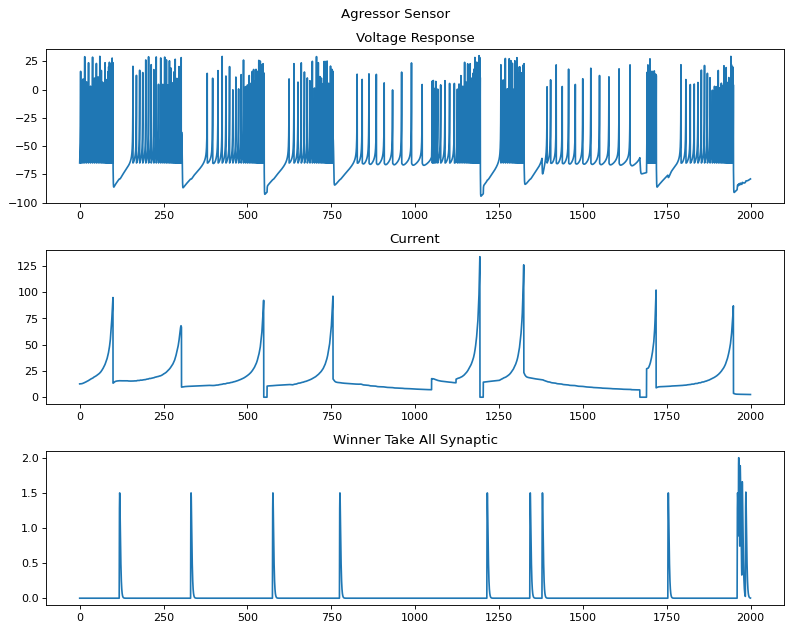

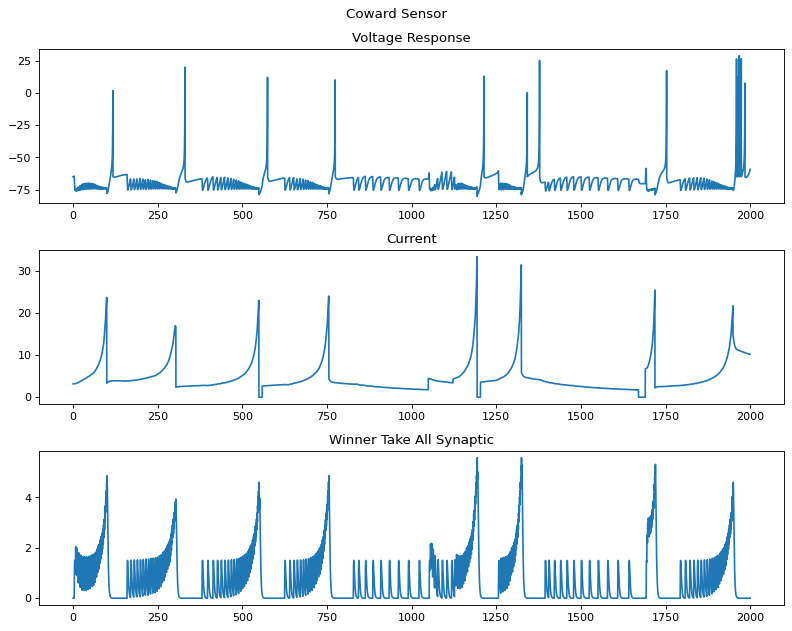

In [102]:
figure(figsize=(10, 8), dpi=80)
subplot(3,1,1)
plot(M_agg_sl.t/ms, M_agg_sl.v[0])
title('Voltage Response')
subplot(3,1,2)
plot(M_agg_sl.t/ms, M_agg_sl.I[0])
title('Current')
subplot(3,1,3)
plot(M_agg_sl.t/ms, M_agg_sl.cowsWIN[0])
title('Winner Take All Synaptic')
suptitle('Agressor Sensor')
tight_layout()
plt.savefig('AgressorSensor.png')

figure(figsize=(10, 8), dpi=80)
subplot(3,1,1)
plot(M_cow_sl.t/ms, M_cow_sl.v[0])
title('Voltage Response')
subplot(3,1,2)
plot(M_cow_sl.t/ms, M_cow_sl.I[0])
title('Current')
subplot(3,1,3)
plot(M_cow_sl.t/ms, M_cow_sl.aggsWIN[0])
title('Winner Take All Synaptic')
suptitle('Coward Sensor')
tight_layout()
plt.savefig('CowardSensor.png')

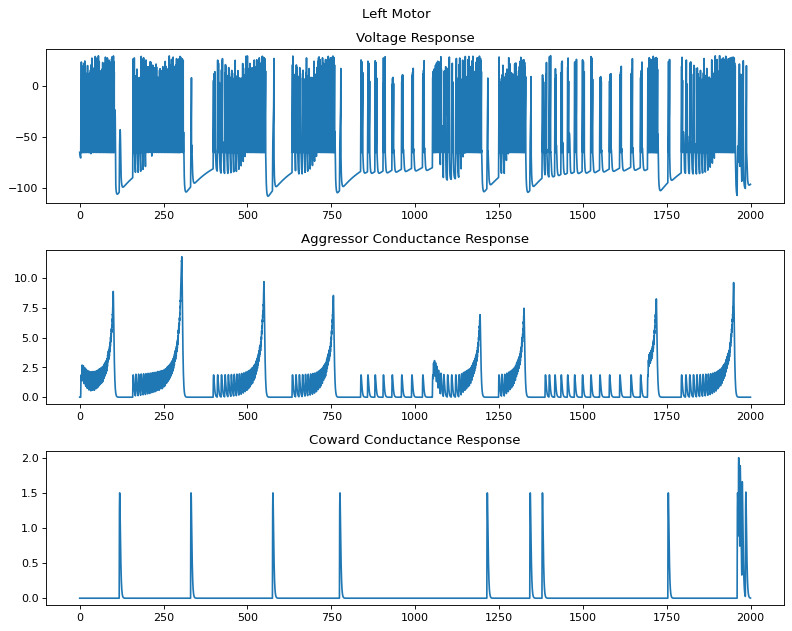

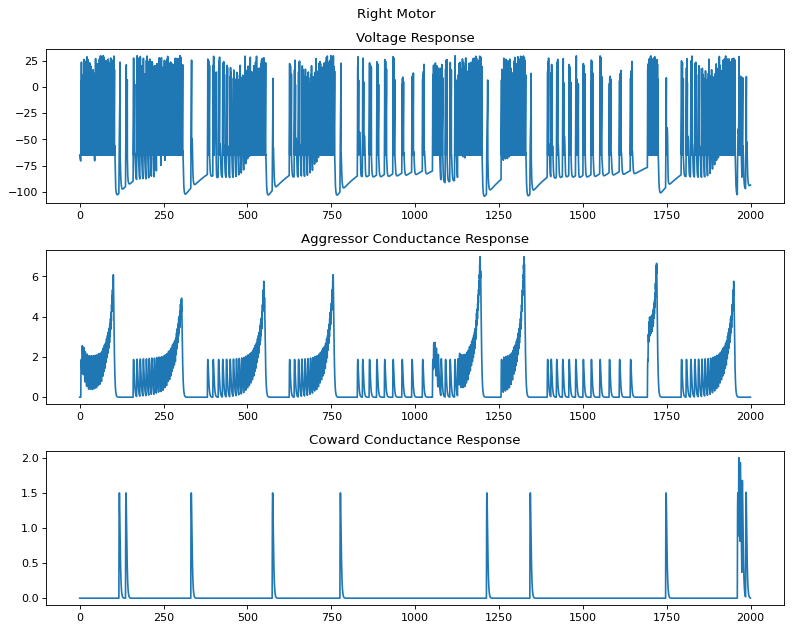

In [103]:
# monitor motors
figure(figsize=(10, 8), dpi=80)
subplot(3,1,1)
plot(M_ml.t/ms, M_ml.v[0])
title('Voltage Response')
subplot(3,1,2)
plot(M_ml.t/ms, M_ml.aggs[0])
title('Aggressor Conductance Response')
subplot(3,1,3)
plot(M_ml.t/ms, M_ml.cows[0])
title('Coward Conductance Response')
suptitle('Left Motor')
tight_layout()
plt.savefig('MotorLeft.png')

figure(figsize=(10, 8), dpi=80)
subplot(3,1,1)
plot(M_mr.t/ms, M_mr.v[0])
title('Voltage Response')
subplot(3,1,2)
plot(M_mr.t/ms, M_mr.aggs[0])
title('Aggressor Conductance Response')
subplot(3,1,3)
plot(M_mr.t/ms, M_mr.cows[0])
title('Coward Conductance Response')
suptitle('Right Motor')
tight_layout()
plt.savefig('MotorRight.png')

In [104]:
# End code

In [86]:
colors

[<Color red>,
 <Color #fb1000>,
 <Color #f72000>,
 <Color #f32f00>,
 <Color #ef3e00>,
 <Color #eb4c00>,
 <Color #e65900>,
 <Color #e26600>,
 <Color #de7300>,
 <Color #da7f00>,
 <Color #d68a00>,
 <Color #d29500>,
 <Color #ce9f00>,
 <Color #caa900>,
 <Color #c6b300>,
 <Color #c2bb00>,
 <Color #b7bd00>,
 <Color #a7b900>,
 <Color #98b500>,
 <Color #89b100>,
 <Color #7bad00>,
 <Color #6da900>,
 <Color #60a500>,
 <Color #53a100>,
 <Color #479d00>,
 <Color #3b9900>,
 <Color #309400>,
 <Color #259000>,
 <Color #1b8c00>,
 <Color #128800>,
 <Color #098400>,
 <Color green>]